In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine=pd.read_csv('D:ExcelR/Assignments/Downloaded/PCA/wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


-No nullvalue

In [4]:
wine[wine.duplicated()].shape

(0, 14)

In [5]:
wine_normal = scale(wine)
# Considering only numerical data 
wine_new = pd.DataFrame(wine, columns=['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline'])
wine_new.drop('Type', axis=1)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
wine_data = std.fit_transform(wine_new)
wine_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca=PCA()
pca.fit(wine_data)

PCA()

In [8]:
pca.explained_variance_ratio_

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

### Second, we need to decide how many features we’d like to keep based on the cumulative variance plot

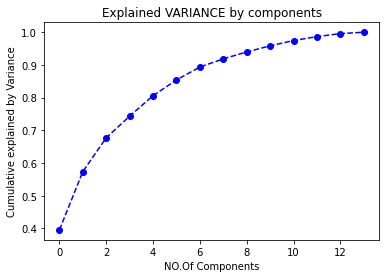

In [9]:
plt.title('Explained VARIANCE by components')
plt.xlabel('NO.Of Components')
plt.ylabel('Cumulative explained by Variance')
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--',color="blue")


The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 6 components

#### As a third step, we perform PCA with the chosen number of components

In [10]:
pca_a=PCA(n_components=3)

In [11]:
pca_a.fit(wine_data)

PCA(n_components=3)

In [12]:
pca_scores=pca_a.transform(wine_data)

### K means clustering with PCA

In [13]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


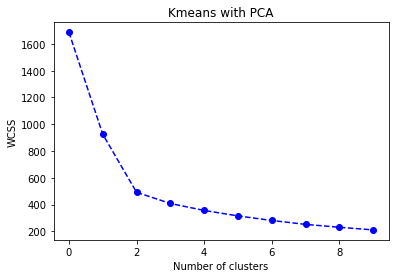

In [14]:
plt.plot(wcss,marker='o',linestyle='--',color="blue")
plt.title('Kmeans with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
df_PCA = pd.DataFrame(data = wine_data, columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','Pc11','pc12','pc13','pc14'])
df_PCA['Type'] = wine['Type']
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Pc11,pc12,pc13,pc14,Type
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


In [16]:
final = pd.concat([pd.DataFrame(pca_scores[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

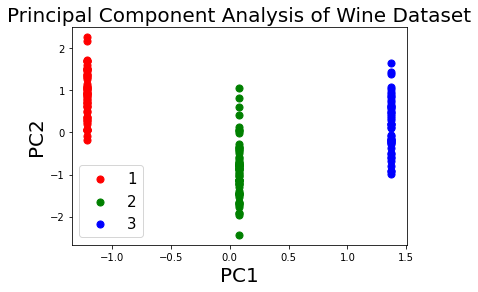

In [17]:
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = [1,2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA['Type'] == target
    plt.scatter(df_PCA.loc[indicesToKeep, 'PC1']
               , df_PCA.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

### Performing both Kmeans and hierarchacal clustering

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


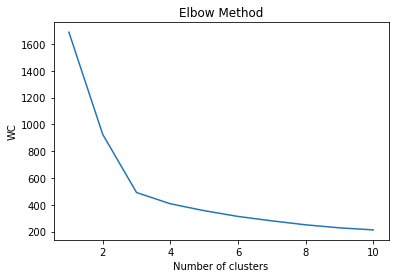

In [18]:
from sklearn.cluster import KMeans

wc=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_scores)
    wc.append(kmeans.inertia_)
plt.plot(range(1, 11), wc)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WC')
plt.show()

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = [2,3,4,5,6,8,10]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_scores)
    silhouette_avg = silhouette_score(pca_scores, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4204121880714802
For n_clusters = 3 The average silhouette_score is : 0.4881750664935784
For n_clusters = 4 The average silhouette_score is : 0.4656302635701832
For n_clusters = 5 The average silhouette_score is : 0.3735731488699907
For n_clusters = 6 The average silhouette_score is : 0.3774317767424684
For n_clusters = 8 The average silhouette_score is : 0.29147751851537573
For n_clusters = 10 The average silhouette_score is : 0.29876981030113936


In [20]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(wine_data)
print(y_pred.shape)
y_pred

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
kmeans.cluster_centers_

array([[ 0.07996036, -0.9221257 , -0.3788889 , -0.46568753,  0.17550695,
        -0.47025072, -0.07393442,  0.04428767,  0.0087608 ,  0.01826487,
        -0.86227808,  0.42450329,  0.24978206, -0.76524984],
       [-1.17152057,  0.87809728, -0.30457633,  0.31894179, -0.66452366,
         0.56488825,  0.87650546,  0.94363903, -0.58558981,  0.58178294,
         0.16718842,  0.48372814,  0.76705349,  1.15834713],
       [ 1.34745816,  0.18654314,  0.90497145,  0.24921026,  0.58370348,
        -0.05063539, -0.988557  , -1.23619475,  0.71684172, -0.74960756,
         0.98849829, -1.19129878, -1.30153966, -0.38004461]])

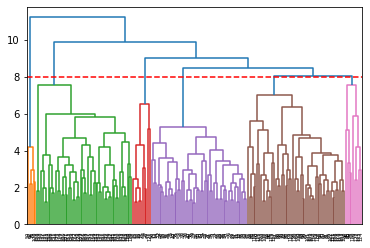

In [22]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(wine_data, method='complete'))
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering 
n_clusters = [2,3,4,5,6,8,10] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(wine_data)
        silhouette_avg2 = silhouette_score(wine_data, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_avg2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2917093910425583
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.04594885928967821
For n_clusters = 2 The average silhouette_score with linkage- average : 0.2406799576881685
For n_clusters = 2 The average silhouette_score with linkage- single : 0.19903671243634574

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3005913531964526
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.18254912152536407
For n_clusters = 3 The average silhouette_score with linkage- average : 0.27088172127301097
For n_clusters = 3 The average silhouette_score with linkage- single : 0.19632210087449534

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2966081467614852
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.10289271204387264
For n_clusters = 4 The average silhouette_score with linkage- average : 0.2446237821339214

#### KMeans clustering with PCA Results

In [24]:
pca_km=pd.concat([wine_new.reset_index(drop=True),pd.DataFrame(pca_scores)],axis=1)

In [25]:
pca_km.columns.values[-3:]=['pc1','pc2','pc3']
pca_km['kmeans']=kmeans.labels_
pca_km.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,pc1,pc2,pc3,kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-3.522934,-1.453098,-0.164795,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-2.528858,0.330019,-2.026707,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-2.785029,-1.036936,0.983238,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-3.922588,-2.768210,-0.174968,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1.407511,-0.867773,2.025829,1


In [26]:
pca_km['kmpca']=pca_km['kmeans'].map({0:'first',1:'second',2:'Third',4:'fourth',5:'fifth',6:'sixth'})
pca_km['kmpca']

0      second
1      second
2      second
3      second
4      second
        ...  
173     Third
174     Third
175     Third
176     Third
177     Third
Name: kmpca, Length: 178, dtype: object

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


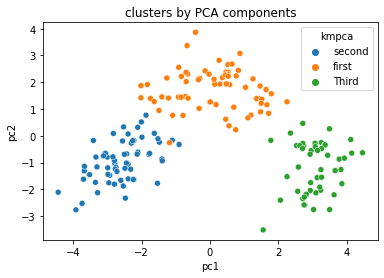

In [27]:
import seaborn as sns
x_axis=pca_km['pc1']
y_axis=pca_km['pc2']
sns.scatterplot(x_axis,y_axis,hue=pca_km['kmpca'])
plt.title("clusters by PCA components")
plt.show()

## Conclusion:-
###Combining PCA and K-Means Clustering: Overview
Finally, it is important to note that our data set contained only a few features . So, when we further reduced the dimensionality, using ‘P C A’ we found out we only need 3 components to separate the data.

That’s the reason why even a two-dimensional plot is enough to see the separation.